In [1]:
from glob import glob
from PIL import Image
import numpy as np
from tqdm.contrib import tenumerate
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import kurtosis

In [2]:
csv_targets = pd.read_csv('../data/z-stacks/logistic_targets.csv')
csv_targets = csv_targets.drop([1, 10])[["index"]].to_numpy() # drop index 7 and 16 (at row 1 and 10), because their images are too small.

In [3]:
image_paths = glob(f"../data/z-stacks/**/*.bmp")
cleaned_image_paths = []
for path in image_paths:
    try:
        if int(path.split('/')[3]) not in csv_targets:
            continue
        cleaned_image_paths.append(path)
    except:
        continue


In [4]:
stack = np.zeros((1000, 1000, 3, len(cleaned_image_paths)))
to_remove = []
for i, path in tenumerate(cleaned_image_paths):
    img = Image.open(path)
    img_data = np.asarray(img)
    try:
        stack[:, :, :, i] = img_data
    except:
        to_remove.append(i)

  0%|          | 0/1693 [00:00<?, ?it/s]

In [5]:
stack_cleaned = np.delete(stack, to_remove, axis=3)

In [6]:
np.save('outputs/stats/cleaned_stack.npy', stack_cleaned)

In [ ]:
stack_cleaned = np.load('outputs/stats/cleaned_stack.npy')

In [7]:
kur = kurtosis(stack_cleaned, axis=3)

: 

: 

In [ ]:
ax = plt.subplot()
ax.plot(kur)

In [42]:
# The mean of the whole dataset is
np.mean(stack_cleaned, axis=(0, 1, 3))

array([3.80627821e+01, 0.00000000e+00, 1.24499975e-02])

In [43]:
# The standard deviation of the whole dataset is
np.std(stack_cleaned, axis=(0, 1, 3))

array([42.51551508,  0.        ,  0.19324445])

In [48]:
# This cell crashes the kernel, but is what I want to do... Subtract the mean and divide by std.
# mean = np.array([3.80627821e+01, 0.00000000e+00, 1.24499975e-02])[None, None, ..., None]
# std = np.array([42.51551508,  0.        ,  0.19324445])[None, None, ..., None]
# normed_stack_cleaned = (stack_cleaned - mean) / std

: 

: 

In [45]:
hist, edges = np.histogram(stack_cleaned[:, :, 0, :], bins='auto')

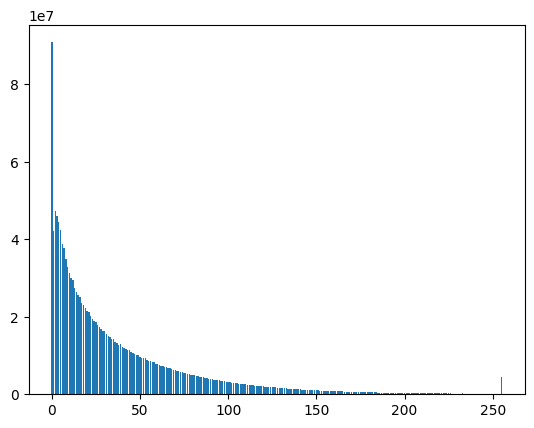

In [47]:
_ = plt.bar(edges[:-1], hist)